In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('WineQT.csv')

Here is a good beginner dataset to prove my skills. I chose this dataset because im a big fan of wine. I lived in Italy for half a year and have a selective few Italian wines that I would like to know which features are influencing my taste. Although we will analyze if each feature has an influence on Quality our YY variable.

In [ ]:
#First we take a look at the data and its statistics
print(df.head(), "\n")
print(df.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
#Here we check if the data had null vallues
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Since the data has no null values we can move on to check if the distribution of the data has any outliers or extreme values and to see if they follow a similar type of metric value. If not then we have to scale the data and normalize it.

                       count        mean         std      min        25%  \
fixed acidity         1143.0    8.311111    1.747595  4.60000    7.10000   
volatile acidity      1143.0    0.531339    0.179633  0.12000    0.39250   
citric acid           1143.0    0.268364    0.196686  0.00000    0.09000   
residual sugar        1143.0    2.532152    1.355917  0.90000    1.90000   
chlorides             1143.0    0.086933    0.047267  0.01200    0.07000   
free sulfur dioxide   1143.0   15.615486   10.250486  1.00000    7.00000   
total sulfur dioxide  1143.0   45.914698   32.782130  6.00000   21.00000   
density               1143.0    0.996730    0.001925  0.99007    0.99557   
pH                    1143.0    3.311015    0.156664  2.74000    3.20500   
sulphates             1143.0    0.657708    0.170399  0.33000    0.55000   
alcohol               1143.0   10.442111    1.082196  8.40000    9.50000   
quality               1143.0    5.657043    0.805824  3.00000    5.00000   
Id          

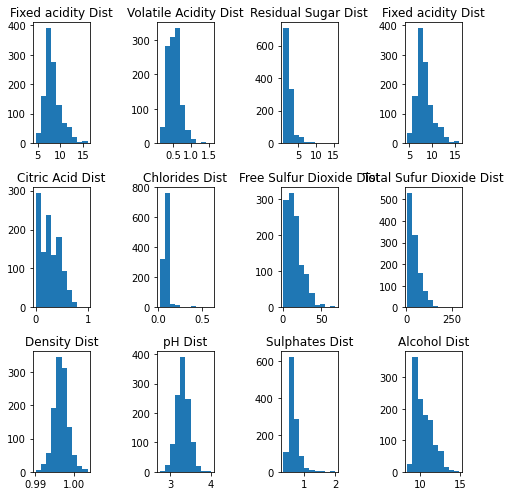

In [ ]:
import matplotlib.pyplot as plt

print(df.describe().T)
#Here we will print the distribution of each feature to get an idea of any potential skewness that could have an effect on its classification.
cols = df.columns
print(list(cols), "\n")

fig, axs = plt.subplots(3, 4, figsize=(7, 7))

axs[0, 0].hist(df['fixed acidity'])
axs[0, 0].set_title('Fixed acidity Dist')

axs[0, 1].hist(df['volatile acidity'])
axs[0, 1].set_title('Volatile Acidity Dist')

axs[0, 2].hist(df['residual sugar'])
axs[0, 2].set_title('Residual Sugar Dist')

axs[0, 3].hist(df['fixed acidity'])
axs[0, 3].set_title('Fixed acidity Dist')

axs[1, 0].hist(df['citric acid'])
axs[1, 0].set_title('Citric Acid Dist')

axs[1, 1].hist(df['chlorides'])
axs[1, 1].set_title('Chlorides Dist')

axs[1, 2].hist(df['free sulfur dioxide'])
axs[1, 2].set_title('Free Sulfur Dioxide Dist')

axs[1, 3].hist(df['total sulfur dioxide'])
axs[1, 3].set_title('Total Sufur Dioxide Dist')

axs[2, 0].hist(df['density'])
axs[2, 0].set_title('Density Dist')

axs[2, 1].hist(df['pH'])
axs[2, 1].set_title('pH Dist')

axs[2, 2].hist(df['sulphates'])
axs[2, 2].set_title('Sulphates Dist')

axs[2, 3].hist(df['alcohol'])
axs[2, 3].set_title('Alcohol Dist')

plt.tight_layout()
plt.show()


fixed acidity


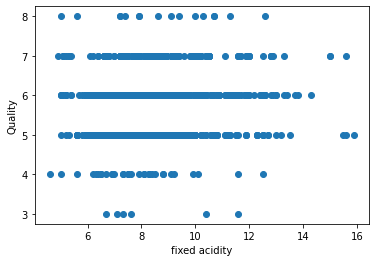

volatile acidity


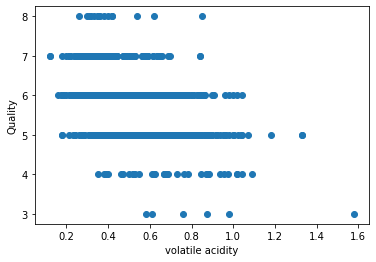

citric acid


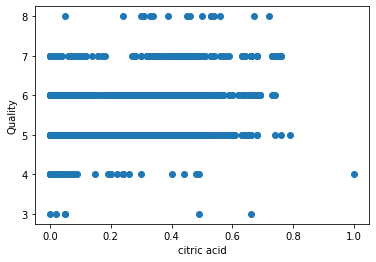

residual sugar


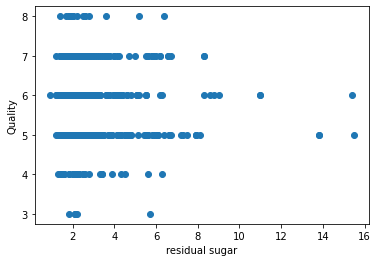

chlorides


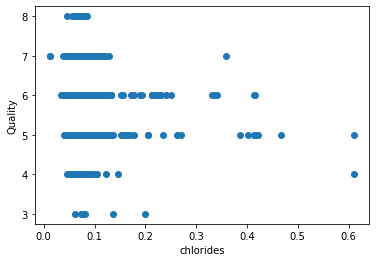

free sulfur dioxide


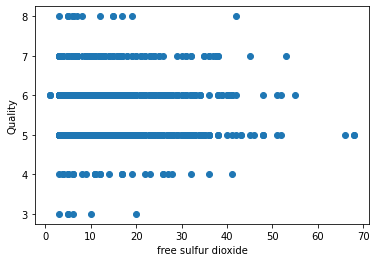

total sulfur dioxide


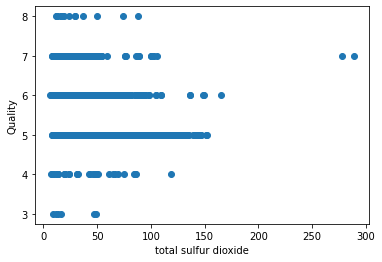

density


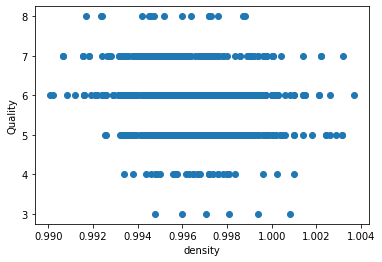

pH


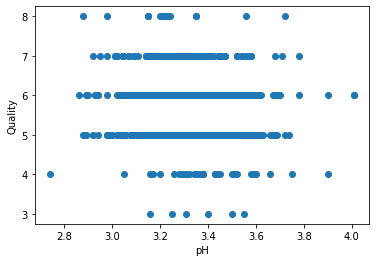

sulphates


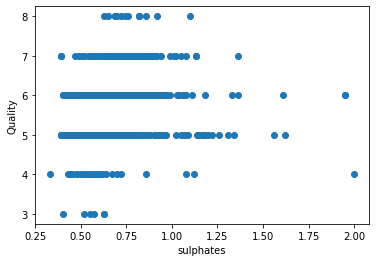

alcohol


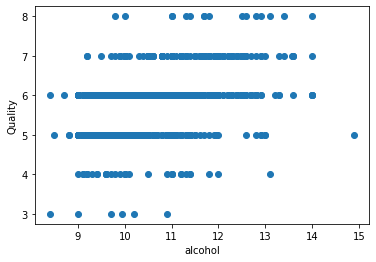

In [ ]:
c = list(cols)
for i in range(len(c)-2):
  print(c[i])
  plt.scatter(df[c[i]], df['quality'])
  plt.xlabel(c[i])
  plt.ylabel('Quality')
  plt.show()

In [ ]:
import seaborn as sns
corrW = df.corr()
corrW.style.background_gradient(cmap = 'coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


Here it seems that there is no direct correlation between any one factor alone. It looks like a multi variable effect. Here we can probably use a linear classifier and or a decision tree approach to predict future alcohols or in this case a test set. We used our correlation matrix to double check and looking on the right side it appears the highest correlation coefficient is 0.48 for alcohol quantity not statistically significant though. 

## K-Neighbors

In [ ]:
from sklearn.model_selection import train_test_split
y = df["quality"]
X = df.loc[:, df.columns!='quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
y_train = y_train.astype('float32').to_numpy().astype(np.float32)
y_test = y_test.astype('float32').to_numpy().astype(np.float32)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scores = {}
maxi = 0
max_score = 0
for i in range(20):
  modelik= KNeighborsClassifier(n_neighbors = i + 1, weights = 'distance', metric = 'manhattan').fit(X_train,y_train)
  modelik.score(X_test,y_test)
  scores[i+1] = modelik.score(X_test, y_test)
  if  modelik.score(X_test, y_test) > max_score:
    max_score = modelik.score(X_test, y_test)
    maxi = i+1
print("Highest score achieved on:", str(max_score)[:5], "using", maxi, "as our k")

Highest score achieved on: 0.633 using 15 as our k


##Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
sscores = []
for c in range(0,6):
    svc = SVC(C = 10**c)
    svc.fit(X_train, y_train)
    i = svc.score(X_test, y_test)
    sscores.append(i)
print(sscores, end = ' ')

[0.6104651162790697, 0.5988372093023255, 0.6627906976744186, 0.5988372093023255, 0.5697674418604651, 0.563953488372093] 

In [ ]:
svc2 = SVC(C = 1E3, kernel = 'rbf').fit(X_train, y_train)
svc2.score(X_test, y_test)

0.5988372093023255